In [61]:
import pandas as pd

# Load the uploaded files
file_paths = [
    '/Users/venkatabhargavmudda/Downloads/E commerce/Amazon Sale Report.csv',
    '/Users/venkatabhargavmudda/Downloads/E commerce/Cloud Warehouse Compersion Chart.csv',
    '/Users/venkatabhargavmudda/Downloads/E commerce/P  L March 2021.csv',
    '/Users/venkatabhargavmudda/Downloads/E commerce/May-2022.csv',
    '/Users/venkatabhargavmudda/Downloads/E commerce/Sale Report.csv',
    '/Users/venkatabhargavmudda/Downloads/E commerce/International sale Report.csv',
    '/Users/venkatabhargavmudda/Downloads/E commerce/Expense IIGF.csv'
]

# Read the data into pandas DataFrames
data_frames = [pd.read_csv(file) for file in file_paths]

# Display basic information about each dataset to understand their structure
info_dict = {}
for i, df in enumerate(data_frames):
    info_dict[file_paths[i]] = df.head()

info_dict


/var/folders/kl/lc7xfb_533q3pd8706mcrsd80000gn/T/ipykernel_198/3742982953.py:15: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



{'/Users/venkatabhargavmudda/Downloads/E commerce/Amazon Sale Report.csv':    index             Order ID      Date                        Status  \
 0      0  405-8078784-5731545  04-30-22                     Cancelled   
 1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
 2      2  404-0687676-7273146  04-30-22                       Shipped   
 3      3  403-9615377-8133951  04-30-22                     Cancelled   
 4      4  407-1069790-7240320  04-30-22                       Shipped   
 
   Fulfilment Sales Channel  ship-service-level    Style              SKU  \
 0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
 1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
 2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
 3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
 4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   
 
         Categor

In [62]:
# Load datasets
amazon_sales = pd.read_csv('/Users/venkatabhargavmudda/Downloads/E commerce/Amazon Sale Report.csv')
sales_report = pd.read_csv('/Users/venkatabhargavmudda/Downloads/E commerce/Sale Report.csv')

# Inspect datasets
amazon_sales_info = amazon_sales.info()
sales_report_info = sales_report.info()

# Display first few rows of each dataset
amazon_sales_head = amazon_sales.head()
sales_report_head = sales_report.head()

amazon_sales_info, amazon_sales_head, sales_report_info, sales_report_head


/var/folders/kl/lc7xfb_533q3pd8706mcrsd80000gn/T/ipykernel_198/2614474042.py:2: DtypeWarning:

Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

(None,
    index             Order ID      Date                        Status  \
 0      0  405-8078784-5731545  04-30-22                     Cancelled   
 1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
 2      2  404-0687676-7273146  04-30-22                       Shipped   
 3      3  403-9615377-8133951  04-30-22                     Cancelled   
 4      4  407-1069790-7240320  04-30-22                       Shipped   
 
   Fulfilment Sales Channel  ship-service-level    Style              SKU  \
 0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
 1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
 2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
 3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
 4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   
 
         Category  ... currency  Amount    ship-city   ship-state  \
 0            

In [63]:
# Clean Amazon Sale Report
amazon_sales['Date'] = pd.to_datetime(amazon_sales['Date'], errors='coerce')
amazon_sales.dropna(subset=['Amount', 'ship-city', 'ship-state'], inplace=True)
amazon_sales.fillna({'Courier Status': 'Unknown', 'promotion-ids': 'None', 'fulfilled-by': 'Unknown'}, inplace=True)


/var/folders/kl/lc7xfb_533q3pd8706mcrsd80000gn/T/ipykernel_198/117099654.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [64]:
# Clean Sale Report
sales_report.dropna(subset=['SKU Code', 'Design No.', 'Stock'], inplace=True)


In [65]:
# Merge Amazon Sale Report and Sale Report
merged_data = pd.merge(amazon_sales, sales_report, left_on='SKU', right_on='SKU Code', how='inner')


In [66]:
# Clean Amazon Sale Report
amazon_sales['Date'] = pd.to_datetime(amazon_sales['Date'], errors='coerce')
amazon_sales.dropna(subset=['Amount', 'ship-city', 'ship-state'], inplace=True)
amazon_sales.fillna({'Courier Status': 'Unknown', 'promotion-ids': 'None', 'fulfilled-by': 'Unknown'}, inplace=True)

# Clean Sale Report
sales_report.dropna(subset=['SKU Code', 'Design No.', 'Stock'], inplace=True)

# Merge Amazon Sale Report and Sale Report
merged_data = pd.merge(amazon_sales, sales_report, left_on='SKU', right_on='SKU Code', how='inner')

# Display information about the merged data
merged_data_info = merged_data.info()
merged_data_head = merged_data.head()

merged_data_info, merged_data_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113900 entries, 0 to 113899
Data columns (total 31 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   index_x             113900 non-null  int64         
 1   Order ID            113900 non-null  object        
 2   Date                113900 non-null  datetime64[ns]
 3   Status              113900 non-null  object        
 4   Fulfilment          113900 non-null  object        
 5   Sales Channel       113900 non-null  object        
 6   ship-service-level  113900 non-null  object        
 7   Style               113900 non-null  object        
 8   SKU                 113900 non-null  object        
 9   Category_x          113900 non-null  object        
 10  Size_x              113900 non-null  object        
 11  ASIN                113900 non-null  object        
 12  Courier Status      113900 non-null  object        
 13  Qty                 113900 no

(None,
    index_x             Order ID       Date                        Status  \
 0        0  405-8078784-5731545 2022-04-30                     Cancelled   
 1     5555  408-9553867-3715507 2022-04-27  Shipped - Delivered to Buyer   
 2    10192  408-7468849-2134719 2022-04-24  Shipped - Delivered to Buyer   
 3    16932  406-8338408-6778764 2022-04-20                     Cancelled   
 4    18468  405-2959500-2916317 2022-04-19  Shipped - Delivered to Buyer   
 
   Fulfilment Sales Channel  ship-service-level   Style             SKU  \
 0   Merchant      Amazon.in           Standard  SET389  SET389-KR-NP-S   
 1   Merchant      Amazon.in           Standard  SET389  SET389-KR-NP-S   
 2   Merchant      Amazon.in           Standard  SET389  SET389-KR-NP-S   
 3   Merchant      Amazon.in           Standard  SET389  SET389-KR-NP-S   
 4   Merchant      Amazon.in           Standard  SET389  SET389-KR-NP-S   
 
   Category_x  ...    B2B fulfilled-by Unnamed: 22  index_y        SKU Code  

# Feature Engineering

In [67]:
# Feature Engineering: Create new features from the Date column
merged_data['Month'] = merged_data['Date'].dt.month
merged_data['DayOfWeek'] = merged_data['Date'].dt.dayofweek

# Create region-based features from the shipping details
merged_data['Region'] = merged_data['ship-state'].apply(lambda x: 'North' if x in ['Haryana', 'Punjab', 'Uttar Pradesh'] else 
                                                                      'South' if x in ['Karnataka', 'Tamil Nadu', 'Kerala'] else
                                                                      'East' if x in ['West Bengal', 'Odisha', 'Assam'] else
                                                                      'West' if x in ['Maharashtra', 'Gujarat', 'Goa'] else 'Central')

# Display the first few rows with new features
merged_data_new_features = merged_data[['Date', 'Month', 'DayOfWeek', 'ship-state', 'Region']].head()
merged_data_new_features


,Date,Month,DayOfWeek,ship-state,Region
0,2022-04-30,4,5,MAHARASHTRA,Central
1,2022-04-27,4,2,HARYANA,Central
2,2022-04-24,4,6,HARYANA,Central
3,2022-04-20,4,2,ASSAM,Central
4,2022-04-19,4,1,UTTAR PRADESH,Central


# Model Development

## Model Preparation


In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['Month', 'DayOfWeek', 'Qty', 'Stock']
merged_data = pd.get_dummies(merged_data, columns=['Region', 'Category_y'], drop_first=True)
target = 'Amount'

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

mse, rmse, r2


(80054.50639128199, 282.9390506651247, 0.022556042123443754)

## Enhance Feature Engineering 

In [69]:
# Check current columns to ensure dummy variables are correctly generated
current_columns = merged_data.columns

# Generate dummy variables only if necessary
if 'Region_North' not in current_columns or 'Category_y_SET' not in current_columns:
    merged_data = pd.get_dummies(merged_data, columns=['Region', 'Category_y'], drop_first=True)

# Add all relevant features
features = ['Month', 'DayOfWeek', 'Qty', 'Stock'] + [col for col in merged_data.columns if 'Region_' in col or 'Category_y_' in col]

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

mse_rf, rmse_rf, r2_rf


(41175.576541603165, 202.9176595114461, 0.49725730234398646)

# Hyperparameter Tuning

In [70]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

best_params, mse_best_rf, rmse_best_rf, r2_best_rf


Fitting 3 folds for each of 24 candidates, totalling 72 fits


({'max_depth': 20,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 200},
 38934.341919539394,
 197.31787024884338,
 0.5246221733334171)

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Parameters: {best_params}")
print(f"MSE: {mse_best_rf}, RMSE: {rmse_best_rf}, R²: {r2_best_rf}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
MSE: 38753.29365805879, RMSE: 196.85856257236765, R²: 0.526832723835138


In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_data is your dataframe
# Add all relevant features
features = ['Month', 'DayOfWeek', 'Qty', 'Stock'] + [col for col in merged_data.columns if 'Region_' in col or 'Category_y_' in col]

# Split the data into training and testing sets
X = merged_data[features]
y = merged_data['Amount']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Initialize Grid Search
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Best parameters and model evaluation
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = mse_best_rf ** 0.5
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Best Parameters: {best_params}")
print(f"MSE: {mse_best_rf}, RMSE: {rmse_best_rf}, R²: {r2_best_rf}")



Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
MSE: 38753.29365805879, RMSE: 196.85856257236765, R²: 0.526832723835138


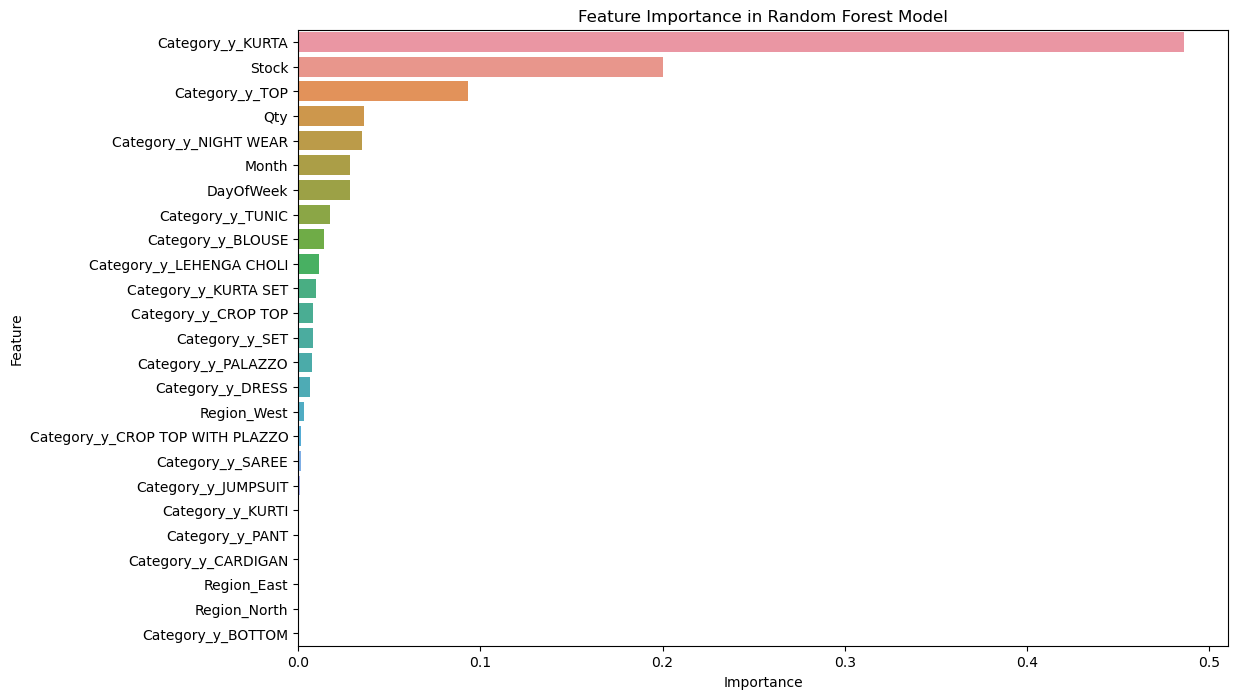

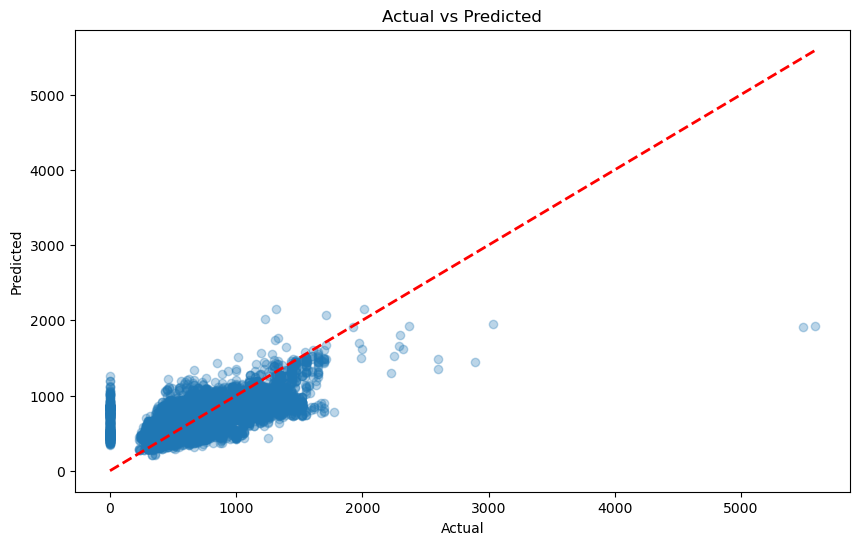

In [73]:
# Feature Importance Plot
feature_importances = best_rf_model.feature_importances_
features = X_train.columns
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance in Random Forest Model')
plt.show()

# Actual vs Predicted Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


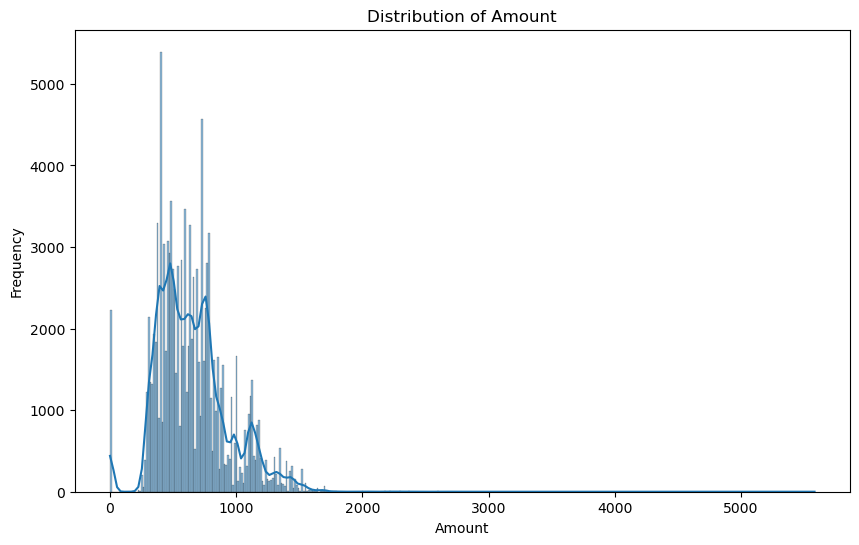

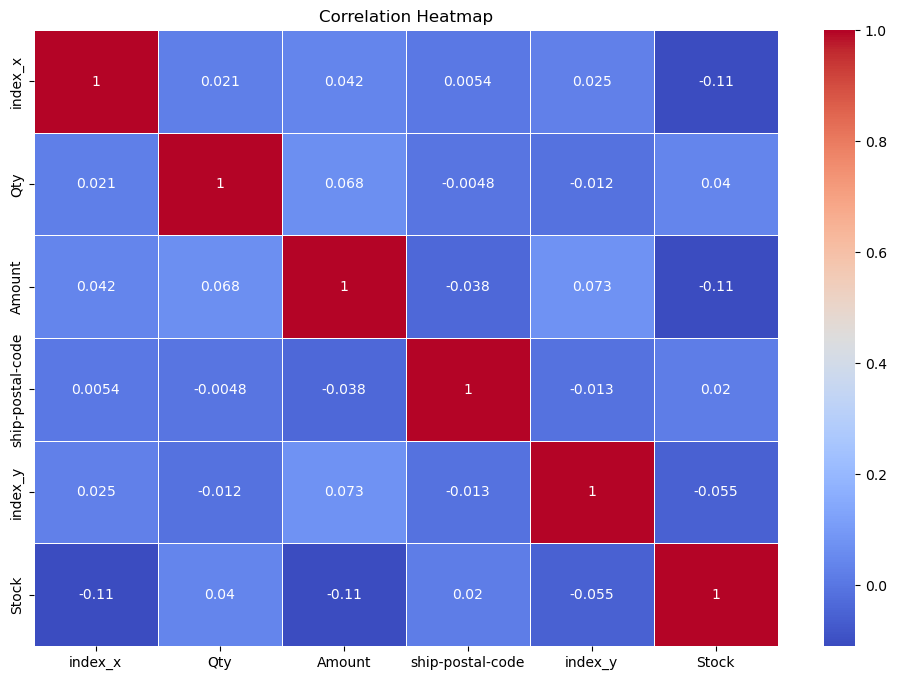

Available Region Columns: ['Region_East', 'Region_North', 'Region_West']


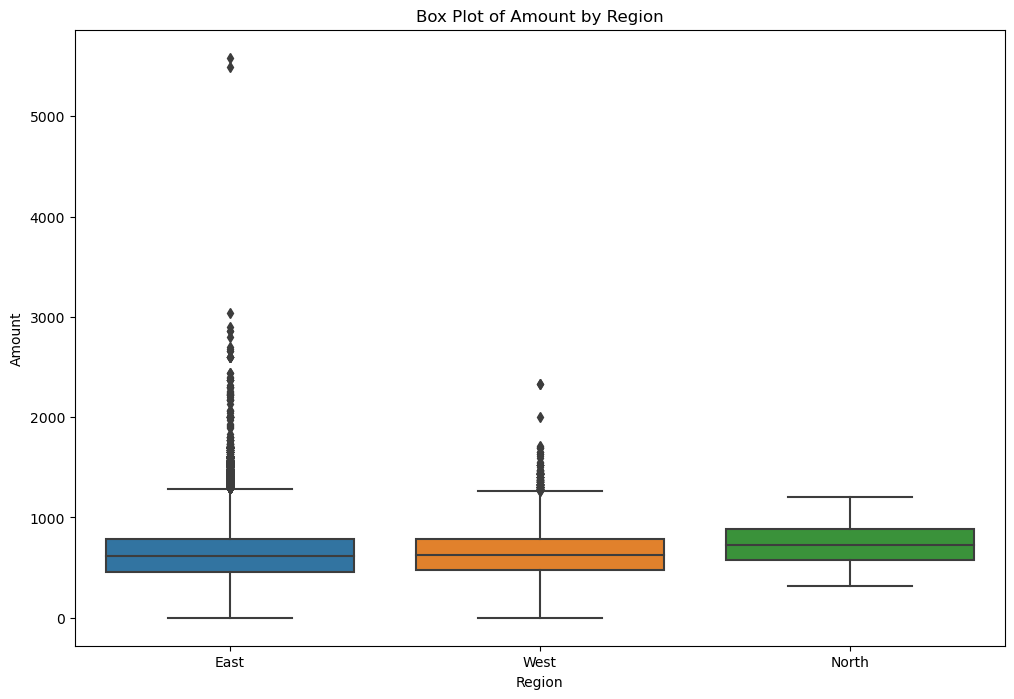

/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



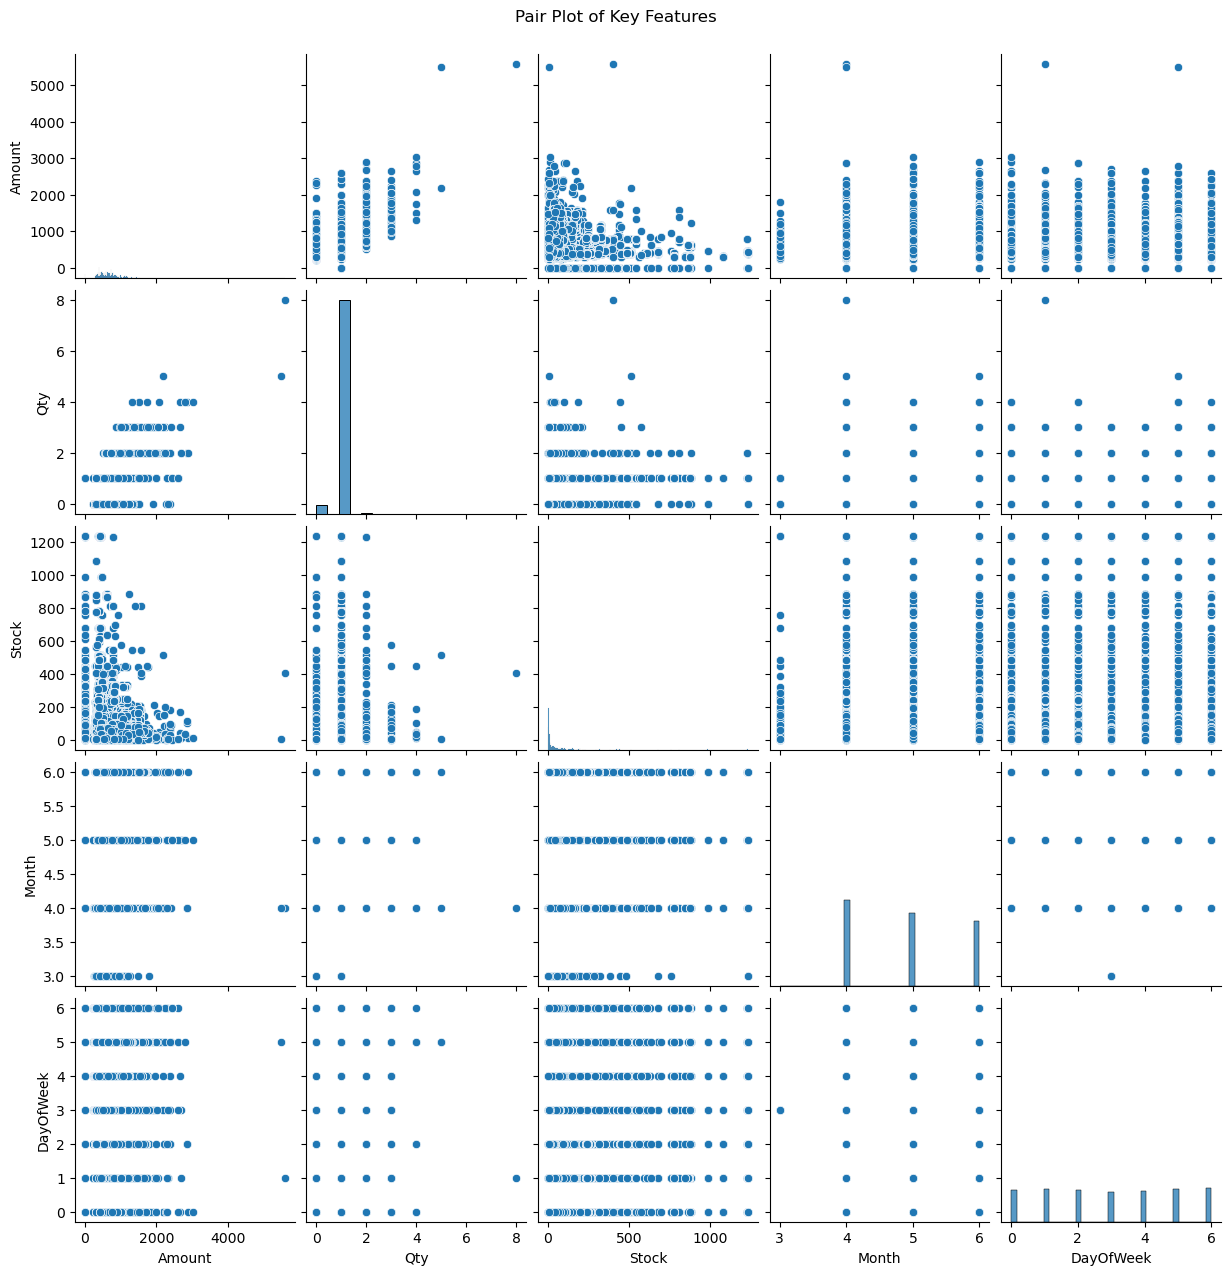

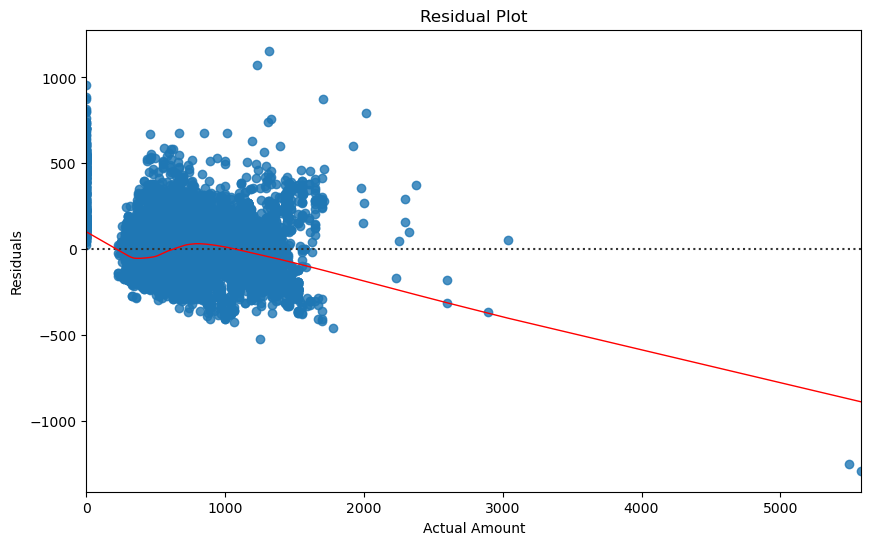

<Figure size 1200x800 with 0 Axes>

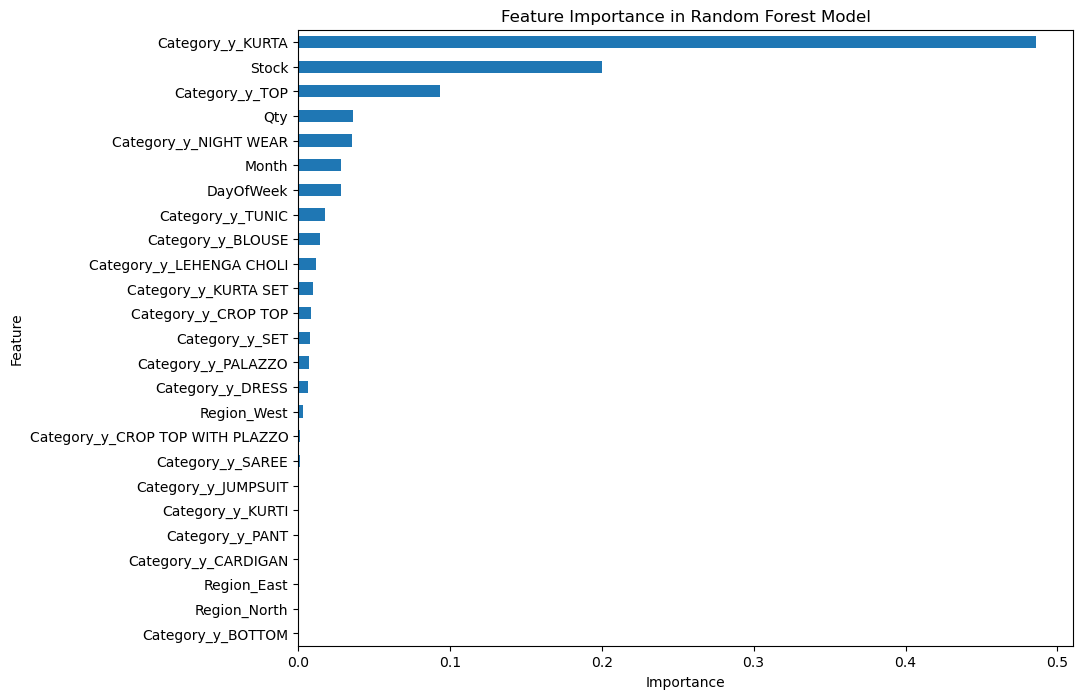

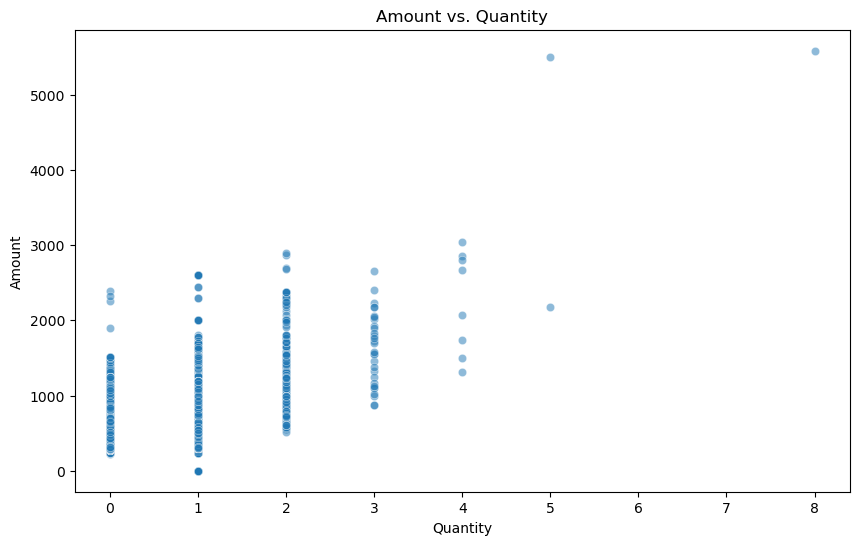

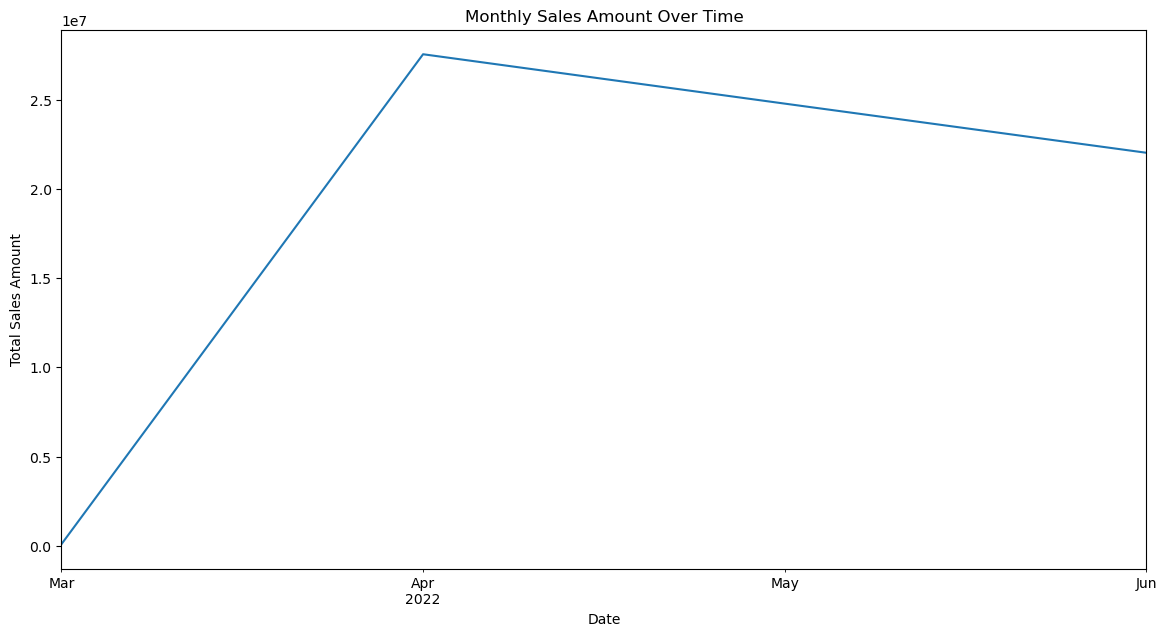

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming merged_data is your dataframe

# 1. Distribution of the Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Amount'], kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 3. Box Plot of Amount by Region
# Check available region columns
region_columns = [col for col in merged_data.columns if col.startswith('Region_')]
print("Available Region Columns:", region_columns)

# Reconstruct 'Region' column from dummy variables if needed
if 'Region' not in merged_data.columns:
    for region in region_columns:
        merged_data[region] = merged_data[region].astype(bool)
    merged_data['Region'] = merged_data[region_columns].idxmax(axis=1).str.replace('Region_', '')

# Plot the box plot for Amount by Region
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Amount', data=merged_data)
plt.title('Box Plot of Amount by Region')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.show()

# 4. Pair Plot
sns.pairplot(merged_data[['Amount', 'Qty', 'Stock', 'Month', 'DayOfWeek']])
plt.suptitle('Pair Plot of Key Features', y=1.02)
plt.show()

# 5. Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_best_rf, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Actual Amount')
plt.ylabel('Residuals')
plt.show()

# 6. Feature Importances (Horizontal Bar Plot)
plt.figure(figsize=(12, 8))
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=True)

importances_df.plot(kind='barh', x='Feature', y='Importance', legend=False, figsize=(10, 8))
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# 7. Scatter Plot of Amount vs. Quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Qty', y='Amount', data=merged_data, alpha=0.5)
plt.title('Amount vs. Quantity')
plt.xlabel('Quantity')
plt.ylabel('Amount')
plt.show()

# 8. Time Series Analysis
plt.figure(figsize=(14, 7))
merged_data.set_index('Date')['Amount'].resample('M').sum().plot()
plt.title('Monthly Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


# Sales Trend Over Time

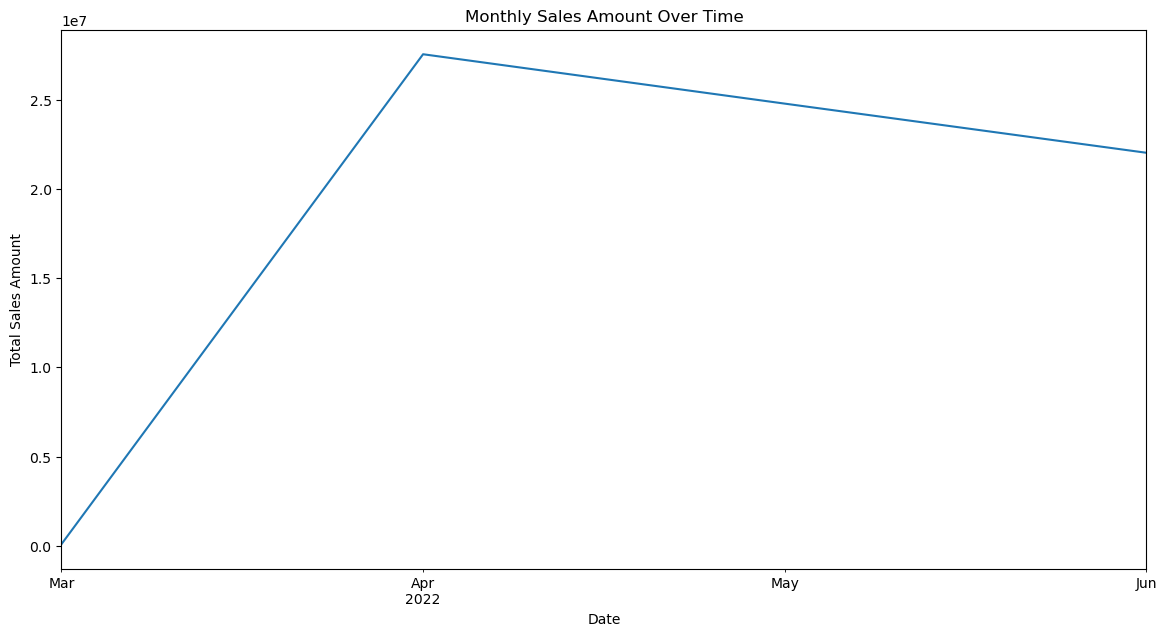

In [75]:
# Time Series Analysis: Sales Trend Over Time
plt.figure(figsize=(14, 7))
merged_data.set_index('Date')['Amount'].resample('M').sum().plot()
plt.title('Monthly Sales Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales Amount')
plt.show()


# Sales by Region

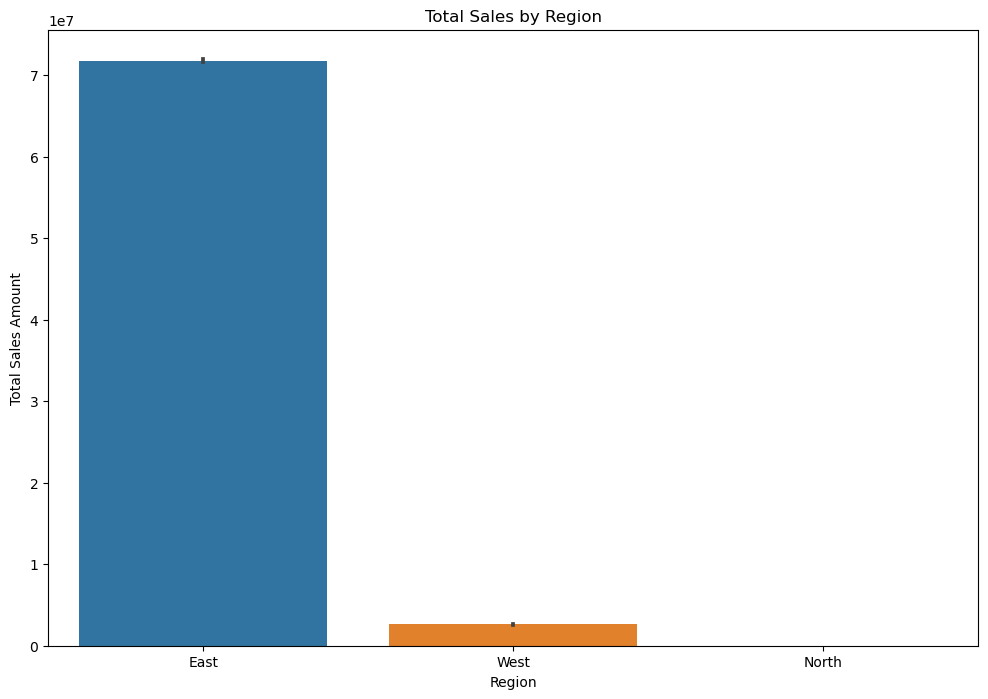

In [76]:
# Sales by Region
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Amount', data=merged_data, estimator=sum)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales Amount')
plt.show()


# Sales by Product Category

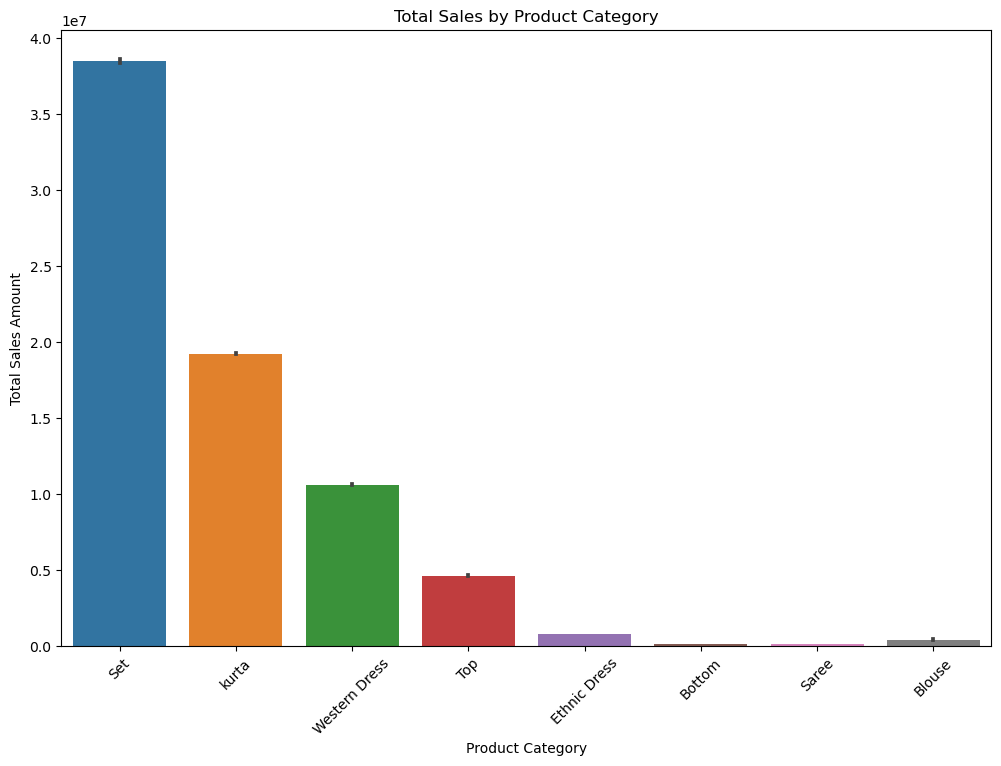

In [77]:
# Sales by Product Category
plt.figure(figsize=(12, 8))
sns.barplot(x='Category_x', y='Amount', data=merged_data, estimator=sum)
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()


# Top-Selling Products

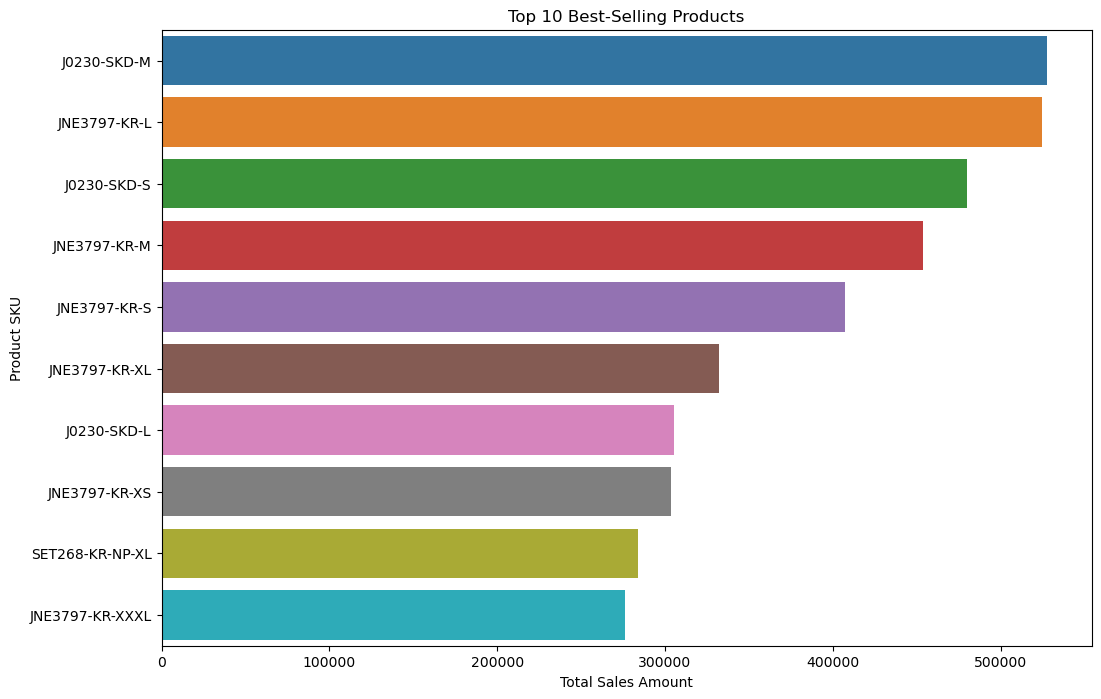

In [78]:
# Top-Selling Products
top_products = merged_data.groupby('SKU')['Amount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales Amount')
plt.ylabel('Product SKU')
plt.show()


# Sales Distribution by Quantity

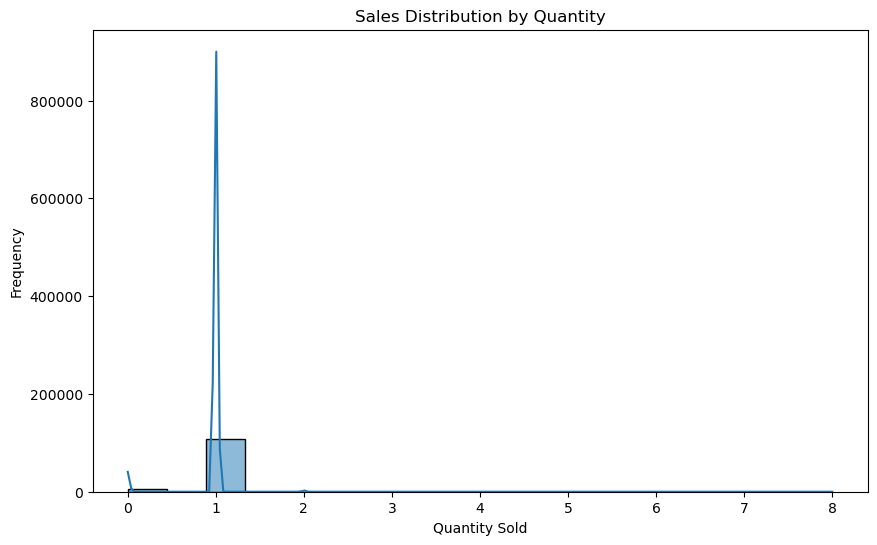

In [79]:
# Sales Distribution by Quantity
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Qty'], kde=True)
plt.title('Sales Distribution by Quantity')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()


# Correlation Analysis

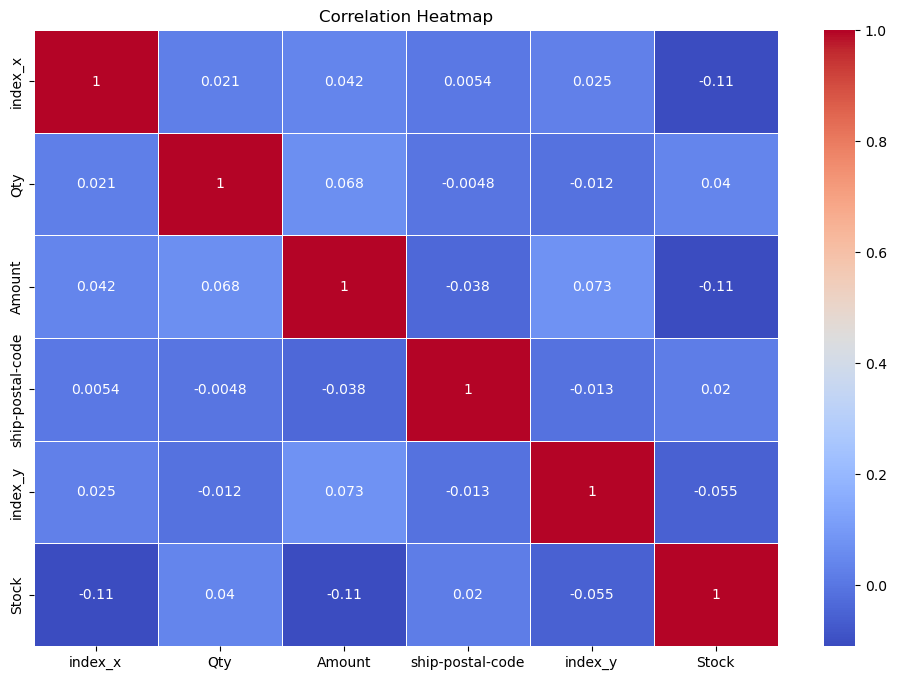

In [80]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
numeric_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = merged_data[numeric_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


# Residual Analysis

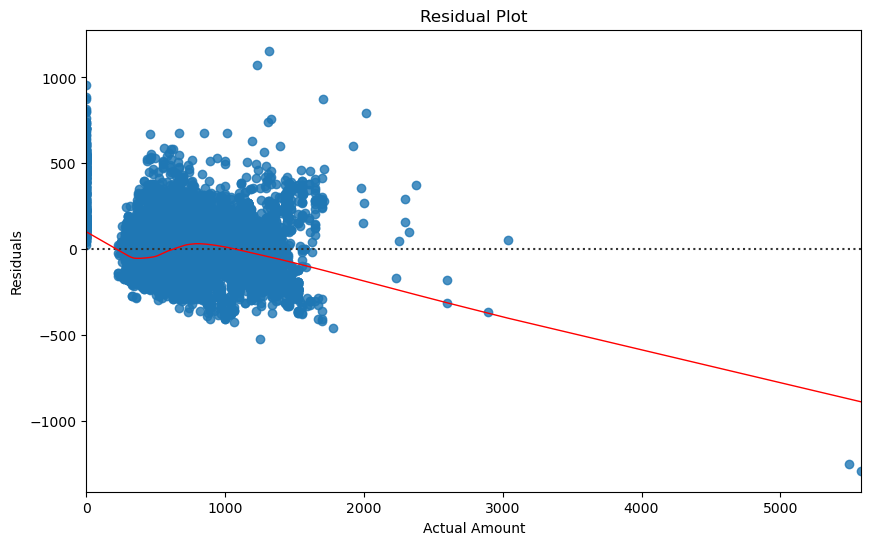

In [81]:
# Residual Plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_test, y=y_pred_best_rf, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Residual Plot')
plt.xlabel('Actual Amount')
plt.ylabel('Residuals')
plt.show()


# Sales Heatmap

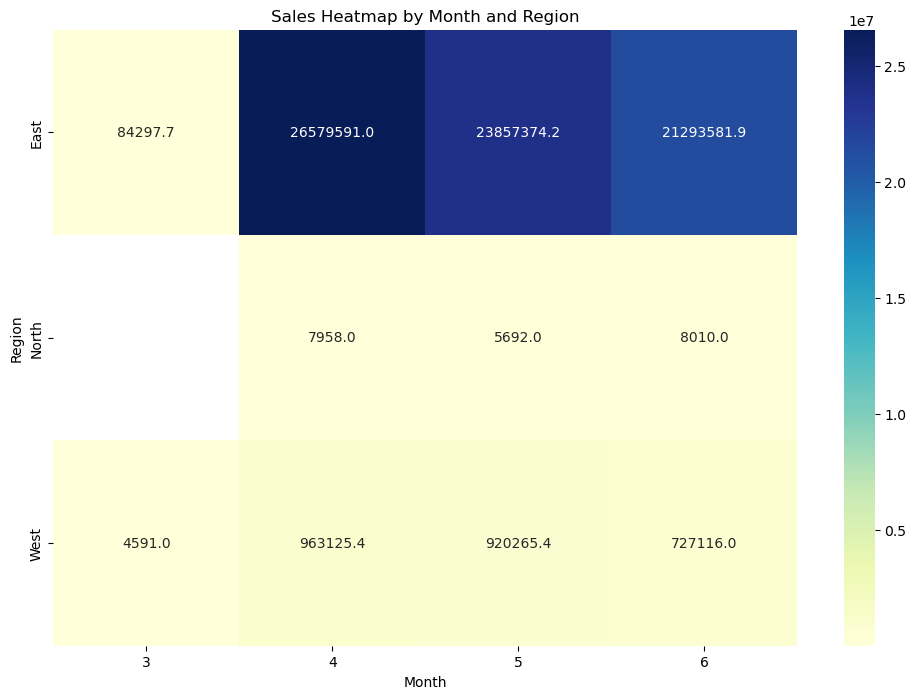

In [82]:
# Sales Heatmap by Month and Region
merged_data['Month'] = merged_data['Date'].dt.month
sales_heatmap = merged_data.pivot_table(index='Region', columns='Month', values='Amount', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(sales_heatmap, annot=True, fmt=".1f", cmap='YlGnBu')
plt.title('Sales Heatmap by Month and Region')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()


# Generating Synthetic Data

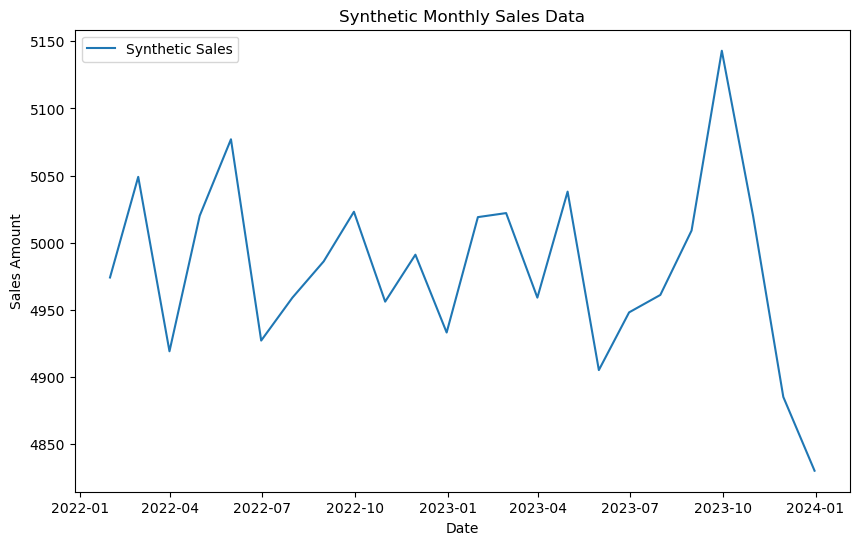

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic sales data for 24 months
np.random.seed(42)
date_range = pd.date_range(start='2022-01-01', periods=24, freq='M')
synthetic_sales = np.random.poisson(lam=5000, size=24)

# Create a DataFrame
synthetic_data = pd.DataFrame({'Date': date_range, 'Amount': synthetic_sales})
synthetic_data.set_index('Date', inplace=True)

# Plot the synthetic sales data
plt.figure(figsize=(10, 6))
plt.plot(synthetic_data, label='Synthetic Sales')
plt.title('Synthetic Monthly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


# Time Series Decomposition with Synthetic Data

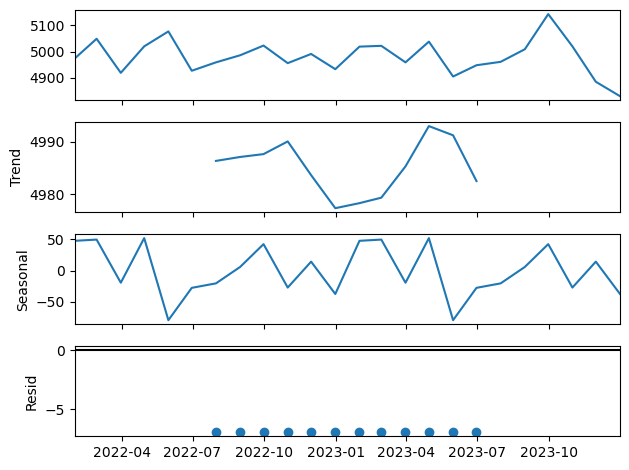

In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series data
decomposition = seasonal_decompose(synthetic_data, model='additive')
fig = decomposition.plot()
plt.show()


# ARIMA Model with Synthetic Data

/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



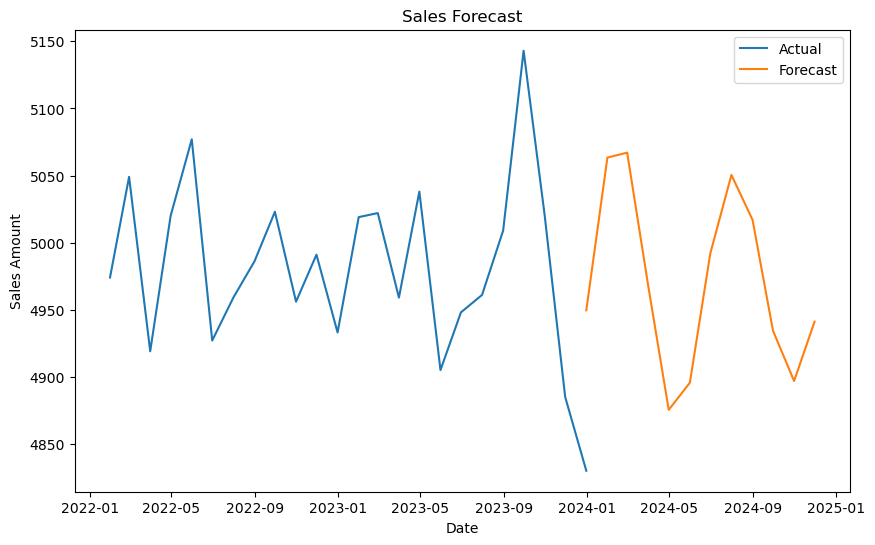

Mean Squared Error: 5433.283995406371


In [85]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Fit ARIMA model
model = ARIMA(synthetic_data, order=(5, 1, 0))
model_fit = model.fit()

# Forecast sales
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(synthetic_data, label='Actual')
plt.plot(pd.date_range(start=synthetic_data.index[-1], periods=12, freq='M'), forecast, label='Forecast')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

# Evaluate the model
mse = mean_squared_error(synthetic_data[-12:], forecast[:12])
print(f'Mean Squared Error: {mse}')


# Simplified Approach for Demonstration

## Moving Average for Smoothing

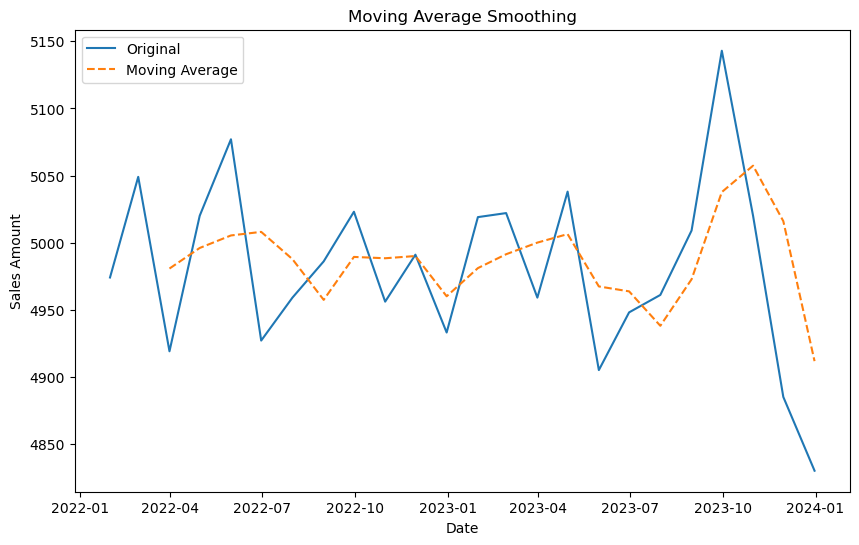

In [86]:
# Calculate moving average
synthetic_data['Moving_Avg'] = synthetic_data['Amount'].rolling(window=3).mean()

# Plot the original and smoothed data
plt.figure(figsize=(10, 6))
plt.plot(synthetic_data['Amount'], label='Original')
plt.plot(synthetic_data['Moving_Avg'], label='Moving Average', linestyle='--')
plt.title('Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


# Interactive Dashboard with Plotly

In [87]:
import plotly.express as px

# Interactive sales trend over time
fig = px.line(synthetic_data, title='Synthetic Monthly Sales Amount Over Time')
fig.show()

# If you had regional data, you could do something similar for regional sales:
# Example with a synthetic 'Region' column added to the synthetic_data DataFrame
synthetic_data['Region'] = np.random.choice(['North', 'South', 'East', 'West'], size=24)

# Interactive sales by region
fig = px.bar(synthetic_data, x='Region', y='Amount', title='Total Sales by Region')
fig.show()


# Steps for Customer Feedback Analysis

## Data Collection

In [88]:
import pandas as pd

# Create a synthetic dataset of customer feedback
data = {
    'CustomerID': [1, 2, 3, 4, 5],
    'Feedback': [
        "The product quality is excellent and delivery was prompt.",
        "Very dissatisfied with the customer service. Will not buy again.",
        "Great value for money. Will recommend to others.",
        "The product was defective and the return process was slow.",
        "Overall, a decent purchase but could improve on packaging."
    ]
}

feedback_df = pd.DataFrame(data)
print(feedback_df)


   CustomerID                                           Feedback
0           1  The product quality is excellent and delivery ...
1           2  Very dissatisfied with the customer service. W...
2           3   Great value for money. Will recommend to others.
3           4  The product was defective and the return proce...
4           5  Overall, a decent purchase but could improve o...


## Preprocessing

In [89]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Preprocess the feedback
def preprocess_text(text):
    text = text.lower()  # Lowercase the text
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\s+', ' ', text)  # Remove extra whitespace
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(tokens)

feedback_df['Cleaned_Feedback'] = feedback_df['Feedback'].apply(preprocess_text)
print(feedback_df)


   CustomerID                                           Feedback  \
0           1  The product quality is excellent and delivery ...   
1           2  Very dissatisfied with the customer service. W...   
2           3   Great value for money. Will recommend to others.   
3           4  The product was defective and the return proce...   
4           5  Overall, a decent purchase but could improve o...   

                                  Cleaned_Feedback  
0        product quality excellent delivery prompt  
1                dissatisfied customer service buy  
2               great value money recommend others  
3            product defective return process slow  
4  overall decent purchase could improve packaging  


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/venkatabhargavmudda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/venkatabhargavmudda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Sentiment Analysis

In [90]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

# Analyze sentiment
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    return scores['compound']

feedback_df['Sentiment_Score'] = feedback_df['Cleaned_Feedback'].apply(analyze_sentiment)
feedback_df['Sentiment'] = feedback_df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))
print(feedback_df)


   CustomerID                                           Feedback  \
0           1  The product quality is excellent and delivery ...   
1           2  Very dissatisfied with the customer service. W...   
2           3   Great value for money. Will recommend to others.   
3           4  The product was defective and the return proce...   
4           5  Overall, a decent purchase but could improve o...   

                                  Cleaned_Feedback  Sentiment_Score Sentiment  
0        product quality excellent delivery prompt           0.5719  Positive  
1                dissatisfied customer service buy          -0.3818  Negative  
2               great value money recommend others           0.8402  Positive  
3            product defective return process slow          -0.4404  Negative  
4  overall decent purchase could improve packaging           0.4404  Positive  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/venkatabhargavmudda/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Topic Modeling 

In [91]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(feedback_df['Cleaned_Feedback'])

# Fit LDA model
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(dtm)

# Display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 1:
product
Topic 2:
product


## Visualization

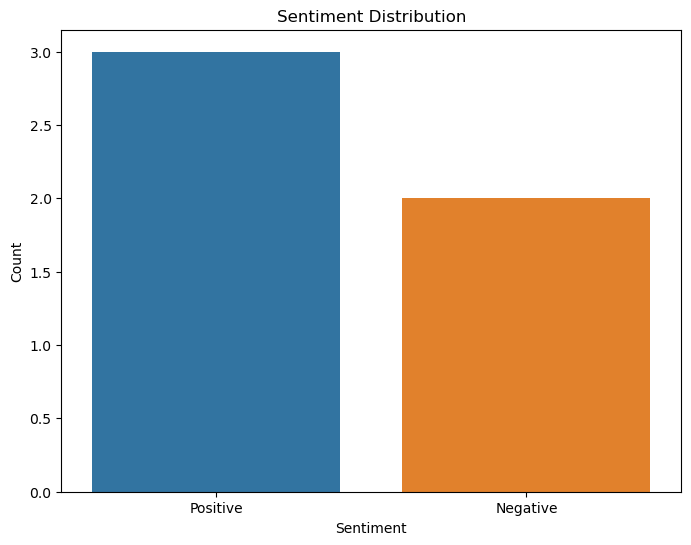

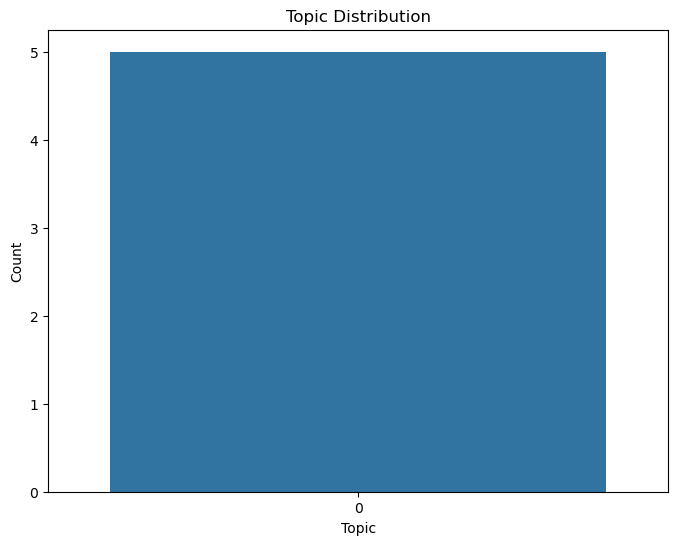

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=feedback_df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Visualize topic distribution
topic_values = lda.transform(dtm)
feedback_df['Topic'] = topic_values.argmax(axis=1)

plt.figure(figsize=(8, 6))
sns.countplot(x='Topic', data=feedback_df)
plt.title('Topic Distribution')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()


# Steps for Advanced Customer Segmentation


## Data Collection

In [93]:
import pandas as pd
import numpy as np

# Create a synthetic dataset of customer transactions
np.random.seed(42)
customer_ids = np.arange(1, 101)
transaction_dates = pd.date_range(start='2023-01-01', periods=200, freq='D')
amounts = np.random.gamma(5, 50, 200)  # Simulate transaction amounts

data = {
    'CustomerID': np.random.choice(customer_ids, 200),
    'TransactionDate': np.random.choice(transaction_dates, 200),
    'Amount': amounts
}

transactions_df = pd.DataFrame(data)
print(transactions_df.head())


   CustomerID TransactionDate      Amount
0           7      2023-04-13  291.201733
1          46      2023-06-15  218.715433
2          13      2023-07-11  208.944670
3          40      2023-02-07  208.946317
4          42      2023-02-19  448.849205


## Feature Engineering


In [94]:
# Feature Engineering
import datetime as dt

# Calculate total amount spent, number of transactions, and average transaction value
customer_summary = transactions_df.groupby('CustomerID').agg({
    'Amount': ['sum', 'count', 'mean']
}).reset_index()

customer_summary.columns = ['CustomerID', 'TotalAmount', 'TransactionCount', 'AverageAmount']

# Calculate recency
most_recent_date = transactions_df['TransactionDate'].max()
customer_recency = transactions_df.groupby('CustomerID')['TransactionDate'].max().reset_index()
customer_recency['Recency'] = (most_recent_date - customer_recency['TransactionDate']).dt.days

# Merge recency with customer summary
customer_summary = customer_summary.merge(customer_recency[['CustomerID', 'Recency']], on='CustomerID')
print(customer_summary.head())


   CustomerID  TotalAmount  TransactionCount  AverageAmount  Recency
0           1   868.953234                 4     217.238308       29
1           3  1383.462383                 4     345.865596       89
2           4   342.067934                 2     171.033967       66
3           5   974.355378                 4     243.588845      104
4           6   534.655061                 3     178.218354       18


## Preprocessing

In [95]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_summary[['TotalAmount', 'TransactionCount', 'AverageAmount', 'Recency']])


## Clustering

In [96]:
from sklearn.cluster import KMeans

# Fit KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(scaled_features)

print(customer_summary.head())


/Users/venkatabhargavmudda/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



   CustomerID  TotalAmount  TransactionCount  AverageAmount  Recency  Cluster
0           1   868.953234                 4     217.238308       29        0
1           3  1383.462383                 4     345.865596       89        0
2           4   342.067934                 2     171.033967       66        1
3           5   974.355378                 4     243.588845      104        0
4           6   534.655061                 3     178.218354       18        1


## Evaluation

In [97]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(scaled_features, customer_summary['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.290928720747116


## Visualization


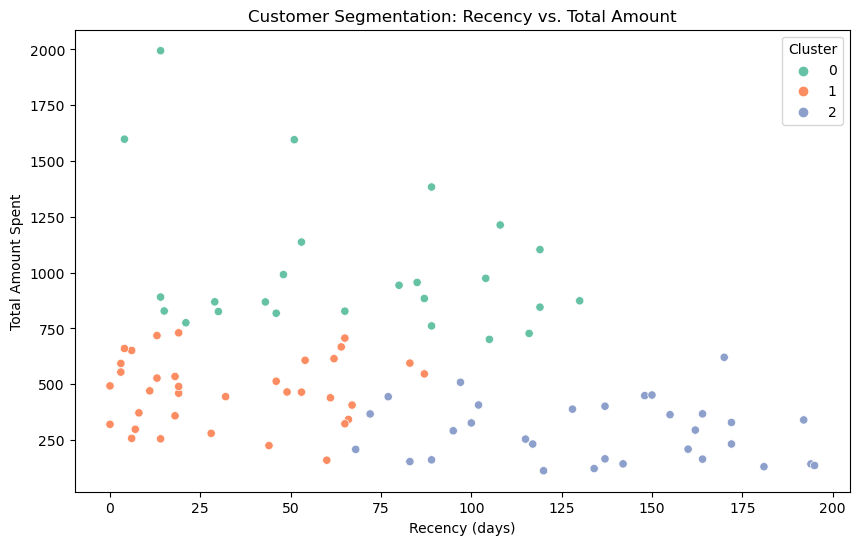

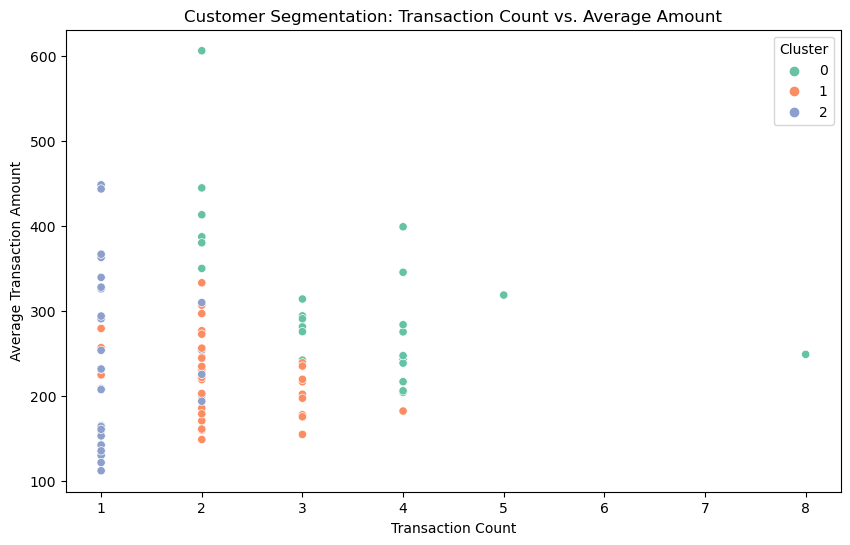

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize customer segments
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='TotalAmount', hue='Cluster', data=customer_summary, palette='Set2')
plt.title('Customer Segmentation: Recency vs. Total Amount')
plt.xlabel('Recency (days)')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='TransactionCount', y='AverageAmount', hue='Cluster', data=customer_summary, palette='Set2')
plt.title('Customer Segmentation: Transaction Count vs. Average Amount')
plt.xlabel('Transaction Count')
plt.ylabel('Average Transaction Amount')
plt.legend(title='Cluster')
plt.show()


# Additional Clustering Algorithms

## Using DBSCAN

Silhouette Score (DBSCAN): -0.07458293361527991


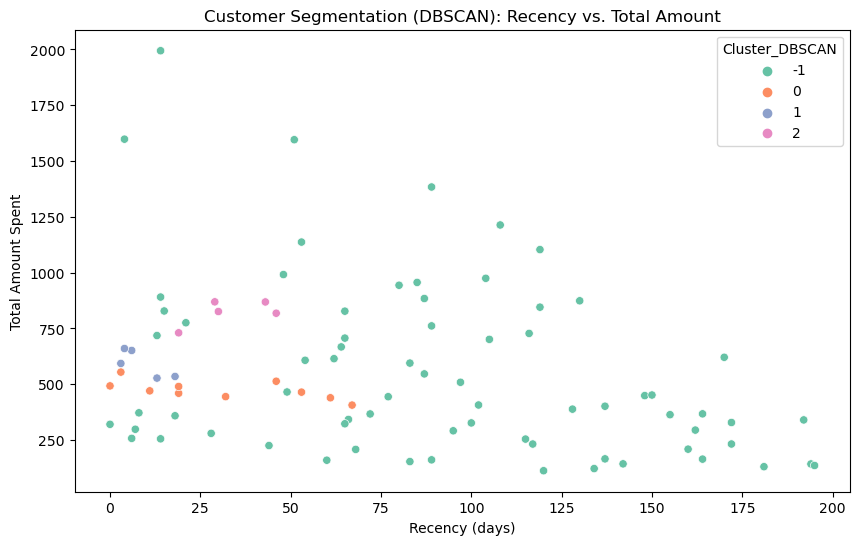

In [99]:
from sklearn.cluster import DBSCAN

# Fit DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_summary['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_features)

# Calculate silhouette score
silhouette_avg_dbscan = silhouette_score(scaled_features, customer_summary['Cluster_DBSCAN'])
print(f'Silhouette Score (DBSCAN): {silhouette_avg_dbscan}')

# Visualize DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='TotalAmount', hue='Cluster_DBSCAN', data=customer_summary, palette='Set2')
plt.title('Customer Segmentation (DBSCAN): Recency vs. Total Amount')
plt.xlabel('Recency (days)')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster_DBSCAN')
plt.show()


## Using Agglomerative Clustering

Silhouette Score (Agglomerative): 0.2995033177383582


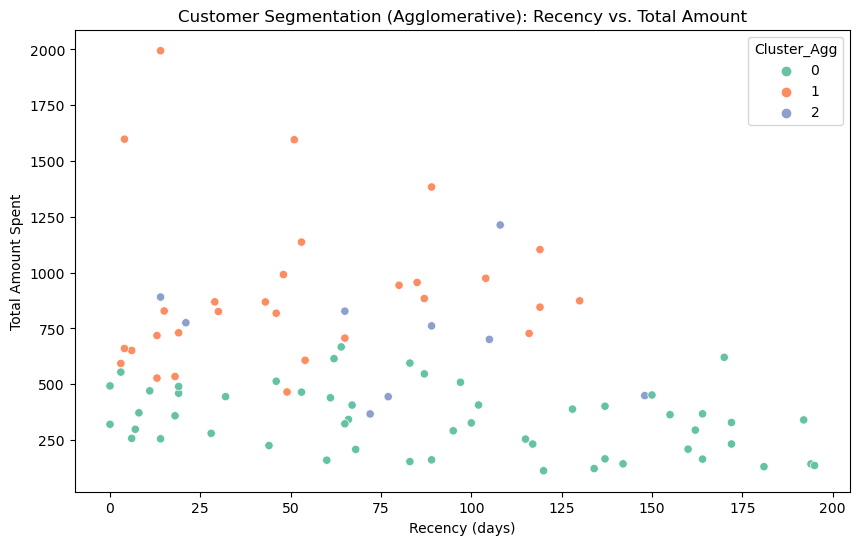

In [100]:
from sklearn.cluster import AgglomerativeClustering

# Fit Agglomerative Clustering model
agg_clustering = AgglomerativeClustering(n_clusters=3)
customer_summary['Cluster_Agg'] = agg_clustering.fit_predict(scaled_features)

# Calculate silhouette score
silhouette_avg_agg = silhouette_score(scaled_features, customer_summary['Cluster_Agg'])
print(f'Silhouette Score (Agglomerative): {silhouette_avg_agg}')

# Visualize Agglomerative Clustering clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='TotalAmount', hue='Cluster_Agg', data=customer_summary, palette='Set2')
plt.title('Customer Segmentation (Agglomerative): Recency vs. Total Amount')
plt.xlabel('Recency (days)')
plt.ylabel('Total Amount Spent')
plt.legend(title='Cluster_Agg')
plt.show()
